*Think Linear Algebra* is not for sale yet, but if you would like to support this project, you can [buy me a coffee](https://buymeacoffee.com/allendowney).

# Dot Product



[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ThinkLinearAlgebra/blob/main/nb/dot.ipynb).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkLinearAlgebra/raw/main/utils.py")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import decorate

In [70]:
from utils import set_precision

set_precision(4)

## Polar Coordinates

Let's start with a two-dimensional vector, `v`.

In [369]:
x, y = 1.2, 2.7
v = np.array([x, y])
v

array([1.2, 2.7])

Here's the graphical representation of this vector as an arrow with its tail at the origin and its head at the point $(1.5, 2)$ in Cartesian coordinates. 

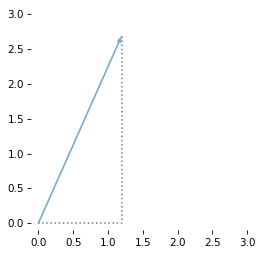

In [408]:
plot_vectors(v)
plt.plot([0, x, x], [0, 0, y], ':', color='gray')
lim = [-0.1, 3.1]
decorate(aspect='equal', xlim=lim, ylim=lim)
remove_spines()

To compute the length of this vector, we can use the Pythagorean formula to compute the hypotenuse of a right triangle with side lengths $1.5$ and $2$.

In [409]:
x, y = v
np.sqrt(x**2 + y**2)

2.9547

Or the `hypot` function does the same thing.

In [410]:
np.hypot(x, y)

2.9547

The length of a vector is called a `norm` -- to be more precise, the length we computed is the 2-norm.
NumPy provides a function that computes it, and it works with any number of dimensions.

In [411]:
from numpy.linalg import norm

norm(v)

2.9547

To represent the direction of the vector, we'll use the angle it forms with the positive $x$ axis, which we can compute using the inverse tangent function, `arctan2`.

In [412]:
theta = np.arctan2(y, x)
theta

1.1526

The length and angle we just computed represent the vector in polar coordinates.
We'll use the following function to convert from Cartesian to polar coordinates.

In [413]:
def cart2pol(v):
    x, y = np.transpose(v)
    r = np.hypot(x, y)
    theta = np.arctan2(y, x)
    return r, theta

Here's the polar representation of `v`.

In [414]:
r, theta = cart2pol(v)
r, theta

(2.9547, 1.1526)

## Projection With Polar Coordinates

Projection might be the most important idea in linear algebra.
To introduce the idea, we'll start by computing the **scalar projection** of `v` onto the $x$ axis, which you can think of as the shadow `v` would cast on the $x$ axis if lighted from above.
By the rules of trigonometry, we can compute it like this.

In [415]:
scalar_proj_x = r * np.cos(theta)
scalar_proj_x

1.2000

Similarly, we can compute the projection of `v` onto the $y$ axis.

In [416]:
scalar_proj_y = r * np.sin(theta)
scalar_proj_y

2.7000

You might notice that these scalar projection are the coordinates of `v`.
So we have found a way to convert polar to Cartesian coordinates, which we can wrap in a function.

In [417]:
def pol2cart(r, theta):
    return r * np.array([np.cos(theta), np.sin(theta)])

In [418]:
pol2cart(r, theta)

array([1.2, 2.7])

Scalar projection is so called because it is a scalar -- that is, a single number, not a vector.
Often it is also useful to compute a **vector projection**.
The vector projection of `v` onto `u` is a vector whose length is the scalar projection and whose direction is the direction of `u`.

To compute the vector projection of `v` onto the $x$ and $y$ axes, we'll define unit vectors that point along the axes.


In [419]:
x_hat = np.array([1, 0])
y_hat = np.array([0, 1])

And multiply them by the scalar projections we just computed.

In [420]:
vector_proj_x = scalar_proj_x * x_hat
vector_proj_y = scalar_proj_y * y_hat

The following figure shows `v` and these vector projections.

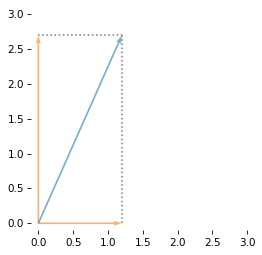

In [423]:
from utils import plot_rejection, remove_spines

plot_vectors([vector_proj_x, vector_proj_y], color='C1')
plot_vectors(v)
plot_rejection(v, x_hat)
plot_rejection(v, y_hat)
decorate(aspect='equal', xlim=lim, ylim=lim)
remove_spines()

In the example so far, it might seem like we've gone in a circle.
We converted `v` from Cartesian to polar coordinates and then back to Cartesian coordinates.

That might not be useful, but I hope it demonstrates the concept of projection.
Now let's do something that will turn out to be surprisingly useful, projecting one vector onto another.
To demonstrate, here's another vector, `u`, in Cartesian coordinates.

In [424]:
u = np.array([3, 1])

Here's a graphical representation of `v` and `u`, and a dotted line that shows the shadow of `v` on `u`, lit from a point on a line perpendicular to `u`.
That's the projection we'll compute -- and we'll do it two ways.

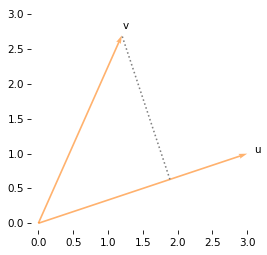

In [425]:
plot_vectors([v, u], color='C1', labels='vu')
plot_rejection(v, u)
decorate(aspect='equal', xlim=lim, ylim=lim)
remove_spines()

The first way is to convert `u` and `v` to polar coordinates.

In [426]:
rs, thetas = cart2pol([u, v])
rs

array([3.1623, 2.9547])

`thetas` contains two angles: from `v` to the $x$ axis, and from `u` to the $x$ axis.

In [427]:
thetas

array([0.3218, 1.1526])

So the difference is the angle between the vectors -- which the following function computes.

In [428]:
def angle_between(u, v):
    rs, thetas = cart2pol([u, v])
    return np.diff(thetas)

In [429]:
theta = angle_between(u, v)

If you look again at the previous figure, you'll see why this angle is useful.
It is the angle of a right triangle whose hypotenuse is the length of `v`.
So the length of the adjacent side is $||v|| \cos \theta$.

In [430]:
comp_v_on_u = norm(v) * np.cos(theta)
comp_v_on_u

array([1.9922])

Now, to find the vector projection, we can multiply the scalar projection by a unit vector in the direction of `u`.

In [431]:
u_hat = u / norm(u)
proj_v_on_u = comp_v_on_u * u_hat
proj_v_on_u

array([1.89, 0.63])

The following figure shows the result.

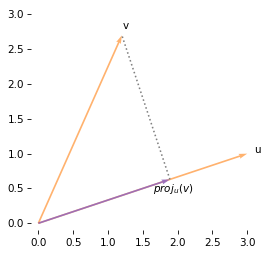

In [432]:
plot_vectors([v, u], color='C1', labels='vu')
plot_rejection(v, u)
plot_vector(proj_v_on_u, color='C4', alpha=0.9, label='$proj_u(v)$', label_pos=1)
decorate(aspect='equal', xlim=lim, ylim=lim)
remove_spines()

To summarize, if we have vectors in polar coordinates, we can compute the projection of one vector onto the other by computing the angle between them and using trigonometry.

But what if we have vectors in Cartesian coordinates?
Of course, we could convert to polar coordinates and then use the first method.
But it turns out there is a shortcut, which we'll discover with some help from SymPy.

## Projection With Cartesian Coordinates

Let's define symbolic versions of the vectors `u` and `v`.

In [442]:
import sympy as sp

ux, uy, vx, vy = sp.symbols('u_x u_y v_x v_y', real=True)

v_sym = Matrix([vx, vy])
u_sym = Matrix([ux, uy])
u_sym

Matrix([
[u_x],
[u_y]])

And convert them to polar coordinates.

In [445]:
r_v = v_sym.norm()
theta_v = sp.atan2(vy, vx)

r_u = u_sym.norm()
theta_u = sp.atan2(uy, ux)

In [443]:
r_u

sqrt(u_x**2 + u_y**2)

In [444]:
theta_u

atan2(u_y, u_x)

Now we can compute the scalar projection of `v` onto `u`.

In [436]:
proj_expr = r_v * sp.cos(theta_v - theta_u)
proj_expr

sqrt(v_x**2 + v_y**2)*cos(atan2(u_y, u_x) - atan2(v_y, v_x))

It's not obvious we have done anything useful, but the expression applies a trig function (cosine) to the inverse of another trig function (tangent), which suggests that there might be a simpler form.
Fortunately, SymPy knows the trigonometric identities, and it can simplify the expression.

In [437]:
proj_expr.simplify()

(u_x*v_x + u_y*v_y)/sqrt(u_x**2 + u_y**2)

The denominator is the norm of `u`, and the numerator is the dot product of `u` and `v`, so we can compute the scalar projection like this.

In [438]:
u_sym.dot(v_sym) / u_sym.norm()

(u_x*v_x + u_y*v_y)/sqrt(u_x**2 + u_y**2)

Let's put that in a function we can use with NumPy arrays.

In [439]:
def scalar_projection(a, b):
    return np.dot(a, b) / norm(b)

If we test it with `v` and `u`, the result is what we got using polar coordinates.

In [440]:
comp_v_on_u = scalar_projection(v, u)
comp_v_on_u

1.9922

Similarly, we can use the following function to compute the vector projection.

In [441]:
def vector_projection(a, b):
    b_hat = b / norm(b)
    return np.dot(a, b_hat) * b_hat

And the result is what we got using polar coordinates.

In [402]:
proj_v_on_u = vector_projection(v, u)
proj_v_on_u

array([1.89, 0.63])

Because the definition of projection involves trigonometry, it might be surprising that we can compute it using only the components of the vectors, with no trigonometric functions.
It might make more sense if you recall that the components of the vectors are projections onto the $x$ and $y$ axes.

The following figure suggests a way to think about the dot product in terms of projections.
If we multiply the $x$ coordinates of `u` and `v`, the product quantifies the combined magnitude of the vectors' projections on the $x$ axis.
Similarly, the product of their $y$ coordinates represents the combined magnitude of their projections on the $y$ axis.
Then the sum of the products combines the components of the projection.

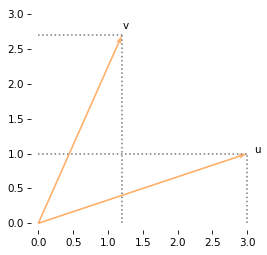

In [403]:
plot_vectors([v, u], color='C1', labels='vu')
for a in [u, v]:
    for b in [x_hat, y_hat]:
        plot_rejection(a, b)

decorate(aspect='equal', xlim=lim, ylim=lim)
remove_spines()

Notice that the dot product is commutative, so `u @ v` and `v @ u` are the same.

In [404]:
np.allclose(u @ v, v @ u)

True

But scalar projection is not commutative, so the projection of `u` onto `v` is not the same as the projection of `v` onto `u`.

In [405]:
scalar_projection(u, v), scalar_projection(v, u)

(2.1322, 1.9922)

In [406]:
proj_u_on_v = vector_projection(u, v)

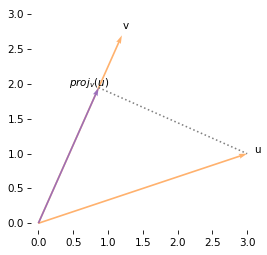

In [407]:
plot_vectors([v, u], color='C1', labels='vu')
plot_rejection(u, v)
plot_vector(proj_u_on_v, color='C4', alpha=0.9, label='$proj_v(u)$', label_pos=11)
decorate(aspect='equal', xlim=lim, ylim=lim)
remove_spines()

In summary, using polar coordinates and trigonometry, we found that we can write the scalar projection of $a$ onto $b$:

$$\mathrm{comp}_b(a) = ||a|| \cos \theta$$

where $\theta$ is the angle between the vectors.
With some help from SymPy, we proved that we can also compute the scalar projection using Cartesian coordinates:

$$\mathrm{comp}_b(a) = \frac{a \cdot b}{||b||}$$

Setting the right sides equal, and multiplying through by the norm of $b$, we have

$$ a \cdot b = ||a|| \, ||b|| \cos \theta $$



## Vector Rejection

## Perpendicular

## Collisions

Let's play pool (or billiards if you prefer).
The game is played on a table with these dimensions in inches.

In [446]:
table_width = 100
table_height = 50

Using balls with this diameter and radius.

In [452]:
ball_diameter = 2.25
ball_radius = ball_diameter / 2

As an example, we'll place the cue ball at the center of the left half of the table, and a target ball at the center of the right half.

In [453]:
cue = np.array([25, 25])
target = np.array([75, 25])

The following function draws the table, the pockets, and the two balls.

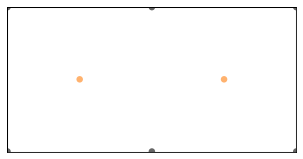

In [454]:
from utils import draw_table, draw_circles

draw_table()
draw_circles([cue, target])

Now we'll create a unit vector that represents the direction of motion for the cue ball.
We'll define it in polar coordinates and then convert to Cartesian.

In [455]:

r = 1
theta = 0.033
direction = pol2cart(r, theta)
direction

array([0.9995, 0.033 ])

After some period of time, suppose the cue ball has traveled a distance of 47 inches.
We'll define a vector, `v`, that represents this motion relative to the starting place.

In [456]:
magnitude = 47
v = magnitude * direction

After moving this distance, the position of the ball is the sum of its starting position and `v`.

In [457]:
pos1 = cue + v

Now let's see how close the cue is to the target ball.
We'll use this function to compute the length of the difference between two vectors.

In [458]:
def distance_between(v1, v2):
    return norm(v1 - v2)

Here's the final distance in this scenario.

In [468]:
distance_between(cue + v, target)

3.3998

And here's a zoomed in view showing `v` and the positions of the cue and target.

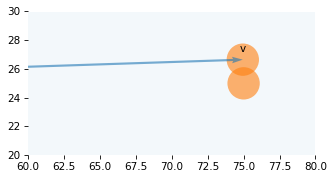

In [555]:
from utils import plot_vector

def draw_collision(v, draw_v=True):
    draw_table(ticks=True)
    draw_circles([cue + v, target])
    if draw_v:
        plot_vector(v, cue, label='v', label_pos=11)
    remove_spines()
    decorate(xlim=[60, 80], ylim=[20, 30])
    
draw_collision(v)

It looks as if the cue will hit the target if it keeps going in this direction, but to make sure, we'll find the value of `magnitude` that minimizes the distance between them.
Then we can check whether this distance is less than one diameter -- if it is, that means the  balls will collide.

The following function takes a hypothetical value of `magnitude`, a direction vector, and the starting positions of the balls.
It returns the distance between the final position of the cue and the target.

In [481]:
def objective_func(magnitude, direction, cue, target):
    v = magnitude * direction
    return distance_between(cue + v, target)

We can invoke the function directly.

In [482]:
objective_func(magnitude, direction, cue, target)

3.3998

But it is meant to be used with the `minimize_scalar` function, which searches for the value of `magnitude` that minimizes the distance between the balls.

In [536]:
from scipy.optimize import minimize_scalar


def minimize_distance(direction, cue, target):
    args = (direction, cue, target)

    upper = distance_between(cue, target)
    print(upper)
    solution = minimize_scalar(
        objective_func, bounds=(0, upper), args=args, method="bounded"
    )

    assert solution.success
    return solution

Here's how we call it.

In [484]:
solution = minimize_distance(direction, cue, target)
solution

 message: Solution found.
 success: True
  status: 0
     fun: 1.6497005413060046
       x: 49.9727772550576
     nit: 18
    nfev: 18

The result is an `OptimizeResult` object that contains a message indicating whether the algorithm found a minimum within the bounds it searched.

In [485]:
solution.message

'Solution found.'

The `x` attribute contains the magnitude that minimizes the distance.

In [493]:
magnitude_min = solution.x
magnitude_min

49.9728

And `fun` contains the objective function evaluated at `x`, which is the distance between balls.

In [487]:
solution.fun

1.6497

If this value is smaller than twice the radius (which is the diameter), that means the balls would collide.
We'll use this function to check.

In [488]:
def will_hit(direction, cue, target, thresh):
    solution = minimize_distance(direction, cue, target)
    return solution.fun < thresh

With the initial direction we chose, the balls will collide.

In [489]:
will_hit(direction, cue, target, ball_diameter)

True

Here's what it looks like when the distance between balls is minimized.

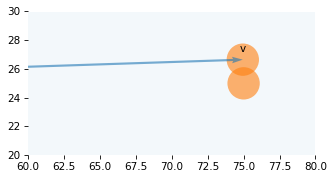

In [491]:
v_min = solution.x * direction
draw_collision(v_min)

The minimal distance tells us whether the balls will collide, but not when they will collide. For that, we have to do one more search.

## Collision Detection

To detect the instant the balls collide, we'll search for the magnitude of the offset vector where the distance is exactly two radiuses.
The following function takes as arguments a hypothetical magnitude, a direction vector, the starting positions of the balls, and the distance between them we are searching for.
It returns an error, which is the difference between the computed distance and the goal distance.

In [492]:
def error_func(magnitude, direction, cue, target, goal_distance):
    actual_distance = objective_func(magnitude, direction, cue, target)
    return actual_distance - goal_distance

For example, if we call it with the first magnitude we tried, `47`, we find that we are off by a little more than an inch.

In [23]:
error_func(magnitude, direction, cue, target, ball_diameter)

np.float64(1.1498408441525232)

We can search more efficiently if we can provide a lower and upper bound on the solution.
As an upper bound, we can use the magnitude where the distance is minimized, which we know is too far.
For a lower bound, we can subtract off one diameter, which must be prior to the collision.

In [24]:
upper = magnitude_min
lower = magnitude_min - ball_diameter

Now we can use `root_scalar` to search for the value of `magnitude` that makes the distance between balls exactly one diameter. 

In [495]:
from scipy.optimize import root_scalar

args = (direction, cue, target, ball_diameter)
solution = root_scalar(error_func, bracket=[lower, upper], args=args, method="brentq")
type(solution)

scipy.optimize._zeros_py.RootResults

The result us a `RootResults` object that contains a flag that indicates whether the search converged to a solution.

In [496]:
solution.flag

'converged'

The `root` attribute contains the value of magnitude at the point of collision.

In [501]:
magnitude_soln = solution.root
magnitude_soln

48.4427

Which we can use to compute the offset vector.

In [502]:
v_soln = magnitude_star * direction

And here's what it looks like at the instant of collision.

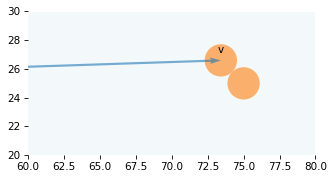

In [504]:
draw_collision(v_soln)

Now let's figure out what happens after the collision.

## Inelastic Collision

To find the point of collision, we used the numerical methods in `minimize_scalar` and `root_scalar`.
These functions are useful for all kinds of scientific and engineering computation, but they are not linear algebra.

But now, to figure out what happens after the collision, we'll use vector projection.



In [507]:
def normalize(v):
    return v / norm(v)

In [570]:
v1 = normalize(v_soln)
v2 = np.array([0, 0])

In [571]:
pos1 = cue + v_soln
pos2 = target
n_hat = normalize(pos2 - pos1)

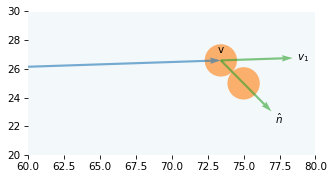

In [572]:
draw_collision(v_soln)
plot_vectors([v1, n_hat], [pos1, pos1], labels=['$v_1$', '$\hat{n}$'], 
             scale=5, color="C2");

In [573]:
v1_normal = vector_projection(v1, n_hat)
v1_tangent = v1 - v1_normal

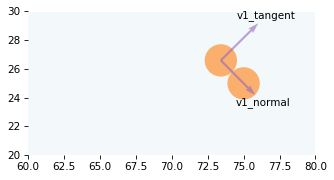

In [584]:
draw_collision(v_soln, draw_v=False)
plot_vectors([v1_normal, v1_tangent], [pos1, pos1], scale=5,
             labels=['v1_normal', 'v1_tangent'], color="C4");

In [574]:
v2_normal = vector_projection(v2, n_hat)
v2_tangent = v2 - v2_normal

In [575]:
v1_after = v1_tangent + v2_normal
v2_after = v2_tangent + v1_normal

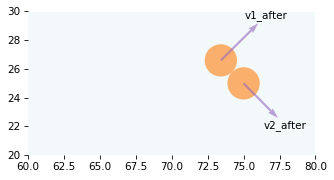

In [581]:
draw_collision(v_soln, draw_v=False)
plot_vectors([v1_after, v2_after], [pos1, pos2], scale=5, 
             labels=['v1_after', 'v2_after'], color="C4");

In [522]:
pocket1 = np.array([table_width, table_height])
pocket2 = np.array([table_width, 0])

In [542]:
pos2 + v2_after_hat * 35

array([98.0717, 48.0717])

In [546]:
v2_after_hat = normalize(v2_after)
will_hit(v2_after_hat, pos2, pocket2, ball_diameter)

35.35533905932738


True

In [547]:
v1_after_hat = normalize(v1_after)
will_hit(v1_after_hat, pos1, pocket1, ball_diameter)

35.41649011176199


True

In [548]:
minimize_distance(v1_after_hat, pos1, pocket1)

35.41649011176199


 message: Solution found.
 success: True
  status: 0
     fun: 2.086727074785902
       x: 35.35496074606412
     nit: 16
    nfev: 16

TypeError: label_vector() got multiple values for argument 'label'

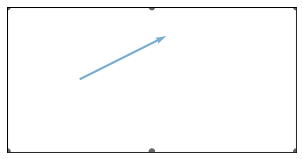

In [42]:
from utils import label_vector

draw_table()
origin = cue
vector = np.array([30, 15])
plot_vector(vector, origin)

for pos in range(12):
    label_vector(vector, origin, label=pos, label_pos=pos, color='C1')

[Think Linear Algebra](https://allendowney.github.io/ThinkLinearAlgebra/index.html)

Copyright 2025 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)